# Flight Data Exploration
## by Kevin Wu

## Preliminary Wrangling

This document explores a dataset containing flight attributes for almost 2,389,217 flights in 2008. To reduce runtime, only the month of January was analyzed, which has 605,765 entries.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read 2008 flight data

df=pd.read_csv('2008.csv')

In [3]:
# Query only data for January to reduce runtime

df=df[df.Month == 1]

In [4]:
print(df.shape)
print(df.dtypes)

(605765, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


In [5]:
df.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
100902,2008,1,6,7,1712.0,1700,1843.0,1817,XE,7763,...,5.0,21.0,0,NaN,0,0.0,0.0,14.0,0.0,12.0
124466,2008,1,9,3,NaN,1620,NaN,2010,XE,2305,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
584327,2008,1,23,3,629.0,630,904.0,908,CO,1169,...,8.0,21.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
391474,2008,1,12,6,1114.0,1120,1212.0,1230,MQ,3558,...,4.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
184600,2008,1,10,4,NaN,1710,NaN,1753,OO,5492,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
496240,2008,1,23,3,1959.0,1840,2103.0,1945,AA,1027,...,8.0,12.0,0,NaN,0,0.0,0.0,0.0,0.0,78.0
216711,2008,1,31,4,1813.0,1759,2116.0,2115,OO,1998,...,13.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
156073,2008,1,10,4,735.0,735,1009.0,951,OH,4959,...,2.0,38.0,0,NaN,0,0.0,0.0,18.0,0.0,0.0
129933,2008,1,2,3,603.0,610,645.0,651,YV,7299,...,4.0,27.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
310057,2008,1,21,1,1045.0,1046,1239.0,1237,DL,991,...,8.0,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,605765.0,605765.0,605765.000000,605765.000000,588457.000000,605765.000000,587130.000000,605765.000000,605765.000000,587130.000000,...,605765.000000,587130.000000,588457.000000,605765.000000,605765.000000,148807.000000,148807.000000,148807.000000,148807.000000,148807.000000
mean,2008.0,1.0,15.908885,3.848879,1341.313469,1330.337020,1491.156790,1499.829660,2229.870511,128.296963,...,720.257461,6.888546,16.797139,0.028572,0.002191,15.832279,2.888493,16.277326,0.086770,21.140054
std,0.0,0.0,8.994594,1.923451,477.113017,463.361168,502.776793,480.073842,1959.893778,70.263954,...,557.607215,5.014824,10.969598,0.166601,0.046753,39.000363,19.491878,31.697242,1.603085,38.808331
min,2008.0,1.0,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,15.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.0,8.000000,2.000000,933.000000,930.000000,1116.000000,1120.000000,614.000000,77.000000,...,321.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,1.0,16.000000,4.000000,1333.000000,1325.000000,1520.000000,1522.000000,1551.000000,111.000000,...,576.000000,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,1.0,24.000000,5.000000,1731.000000,1719.000000,1914.000000,1910.000000,3669.000000,159.000000,...,951.000000,8.000000,20.000000,0.000000,0.000000,17.000000,0.000000,20.000000,0.000000,27.000000
max,2008.0,1.0,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9202.000000,693.000000,...,4962.000000,213.000000,383.000000,1.000000,1.000000,1158.000000,1049.000000,1357.000000,136.000000,897.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605765 entries, 0 to 605764
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               605765 non-null  int64  
 1   Month              605765 non-null  int64  
 2   DayofMonth         605765 non-null  int64  
 3   DayOfWeek          605765 non-null  int64  
 4   DepTime            588457 non-null  float64
 5   CRSDepTime         605765 non-null  int64  
 6   ArrTime            587130 non-null  float64
 7   CRSArrTime         605765 non-null  int64  
 8   UniqueCarrier      605765 non-null  object 
 9   FlightNum          605765 non-null  int64  
 10  TailNum            595813 non-null  object 
 11  ActualElapsedTime  587130 non-null  float64
 12  CRSElapsedTime     605659 non-null  float64
 13  AirTime            587130 non-null  float64
 14  ArrDelay           587130 non-null  float64
 15  DepDelay           588457 non-null  float64
 16  Or

In [8]:
df[df.Cancelled==1].sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
473173,2008,1,9,3,NaN,1240,NaN,1410,9E,5854,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
259223,2008,1,3,4,NaN,1325,NaN,1506,US,846,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
419153,2008,1,15,2,NaN,800,NaN,915,MQ,4725,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
455647,2008,1,9,3,NaN,1500,NaN,1845,9E,2851,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
403332,2008,1,25,5,NaN,555,NaN,730,MQ,4038,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
522291,2008,1,25,5,NaN,1325,NaN,1445,AA,2017,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
475181,2008,1,27,7,NaN,1200,NaN,1309,9E,5918,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
213286,2008,1,28,1,NaN,1428,NaN,1605,OO,6533,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
168797,2008,1,31,4,NaN,1615,NaN,1839,OH,5094,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
109318,2008,1,9,3,NaN,1750,NaN,1954,XE,3142,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN


In [9]:
df.TailNum.value_counts()

N484HA    398
N480HA    391
N835AL    388
N836AL    383
N487HA    379
         ... 
N603DL      1
N182UA      1
N174DZ      1
N7BTAA      1
N292AA      1
Name: TailNum, Length: 4878, dtype: int64

### What is the structure of your dataset?

The dataset has 605,765 entries with 29 attributes. There is a mix of datatypes. For instance, there are categorical data (e.g. Cancelled in boolean), numerical data (e.g. Distance), and datetime data (e.g. Departure Time).

### What is/are the main feature(s) of interest in your dataset?

I am interested in investigating which attributes best predict flight cancellations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Since a lot of the attributes are marked as NaN for cancelled flights, predictive attributes are limited to the attributes with data. 

From the attributes with data, I expect the following to have an impact:
1. Carrier
3. Certain Locations (Origin and Destinations)
2. Certain Planes (TailNum)
5. Distance
6. Day of the Week
4. Departure Time

## Univariate Exploration


#### Univariate Exploration #1: Cancelled vs Not Cancelled Count

We are looking at the cancelled vs not cancelled counts to get an idea of cancelled proportions.

C:\Users\kevgw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


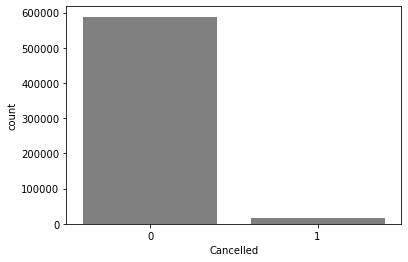

In [10]:
#Flights cancelled

sb.countplot(df.Cancelled, color='grey');

**Comments:** It is clear that there is a very small percent of flights that are cancelled.

#### Univariate Exploration #2: Cancellation Code Distribution

We are looking at the cancelled code (reasons) counts per category to understand the cancelled flights.

C:\Users\kevgw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


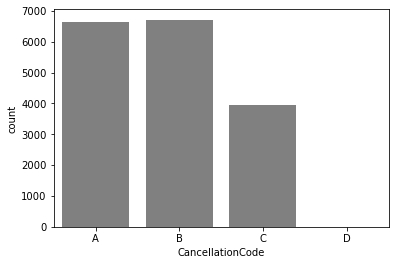

In [11]:
#Flight cancellation code count

order1= ['A', 'B', 'C', 'D']
sb.countplot(df.CancellationCode, color='grey', order=order1);

**Comments:** It appears that most cancellations are due to carrier reasons (A), weather (B), and NAS (C), which is an umbrella category for cancellations that could have been addressed by the National Aviation System. 

This appears suggest that certain origins/destinations and carriers/planes might have higher cancellations due to propensity for certain weather conditions and carrier/plane quality.

#### Univariate Exploration #3: Flights per Carrier

We are looking at the flights per carrier to see how these distribute.

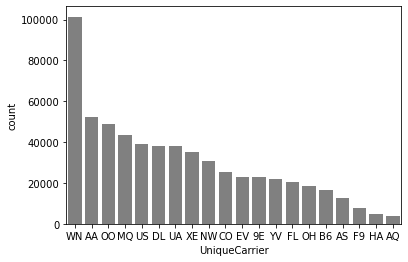

In [12]:
#Flight carrier count (all flights)

order2=df.UniqueCarrier.value_counts().nlargest(20).index
sb.countplot(data=df,x='UniqueCarrier', color='grey', order=order2);

#### Univariate Exploration #4: Flights per Destination

We are looking at the number of flights per destination.

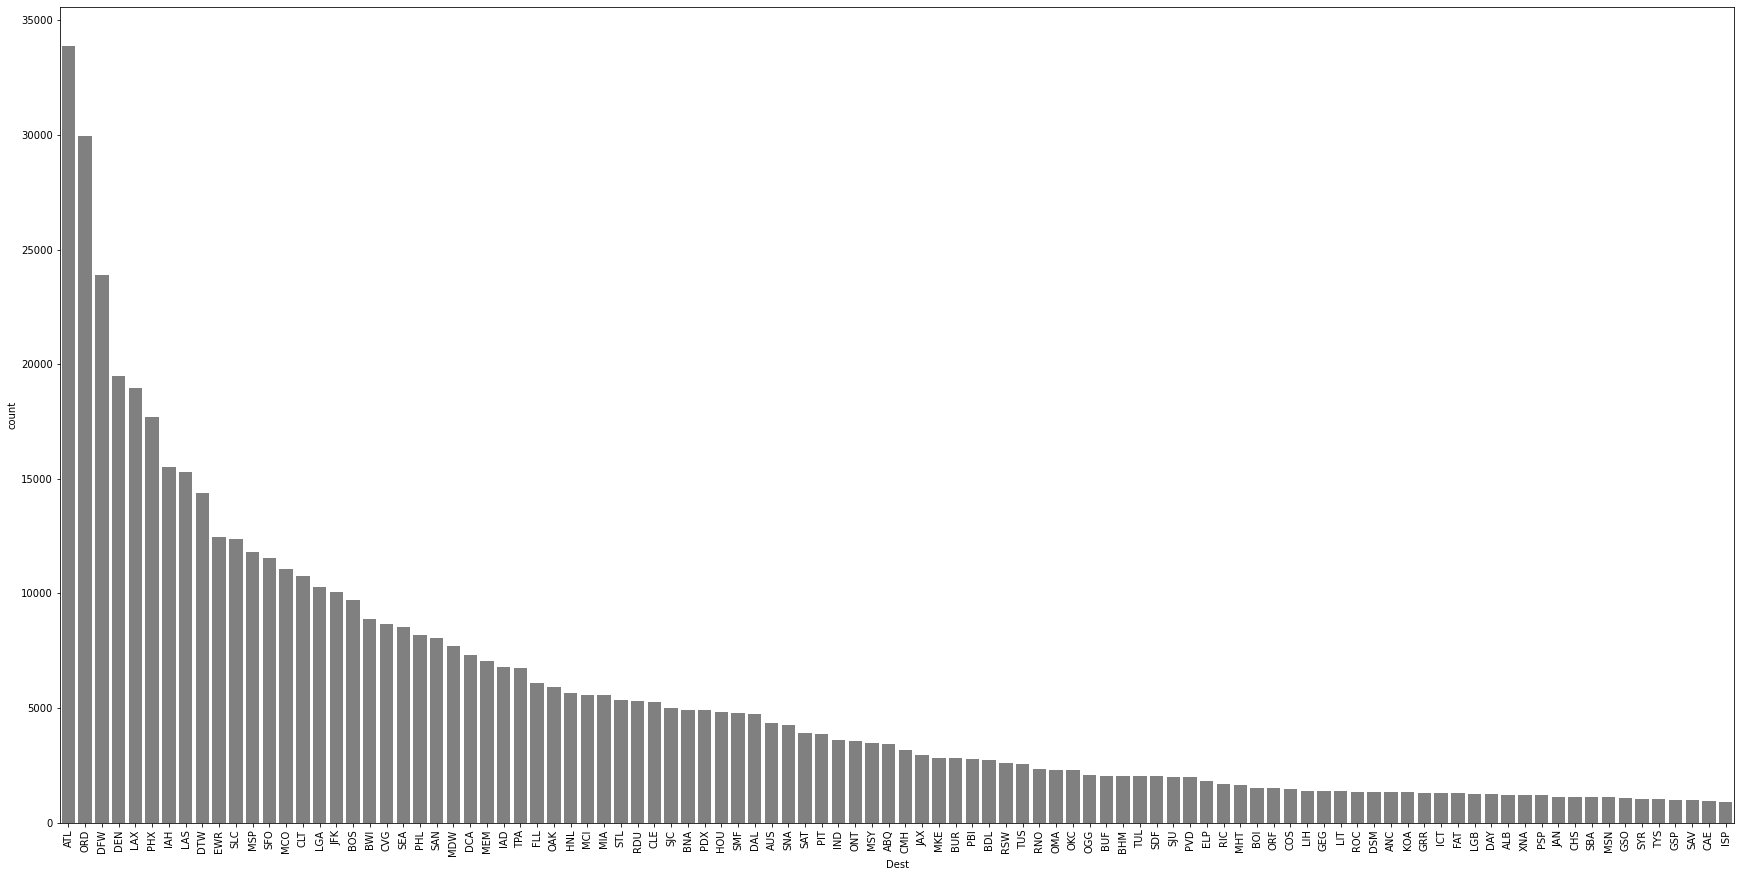

In [13]:
#Flight destination count (all flights) - Only shown Top 100 destinations shown.

plt.figure(figsize=(30,15))
order3=df.Dest.value_counts().nlargest(100).index
sb.countplot(data=df, x='Dest', color='grey', order=order3);
plt.xticks(rotation=90);

**Comments:** It appears that most flights occur at international airports as expected. The distribution between airports and flight counts appears to taper off somewhat gradually as an exponential decay as it gets to more local airports. However, the top airports (1-10) tend to have a bigger market share than the next top airlines as expected.

#### Univariate Exploration #5: Flights per Origin

We are looking at the number of flights per origin.

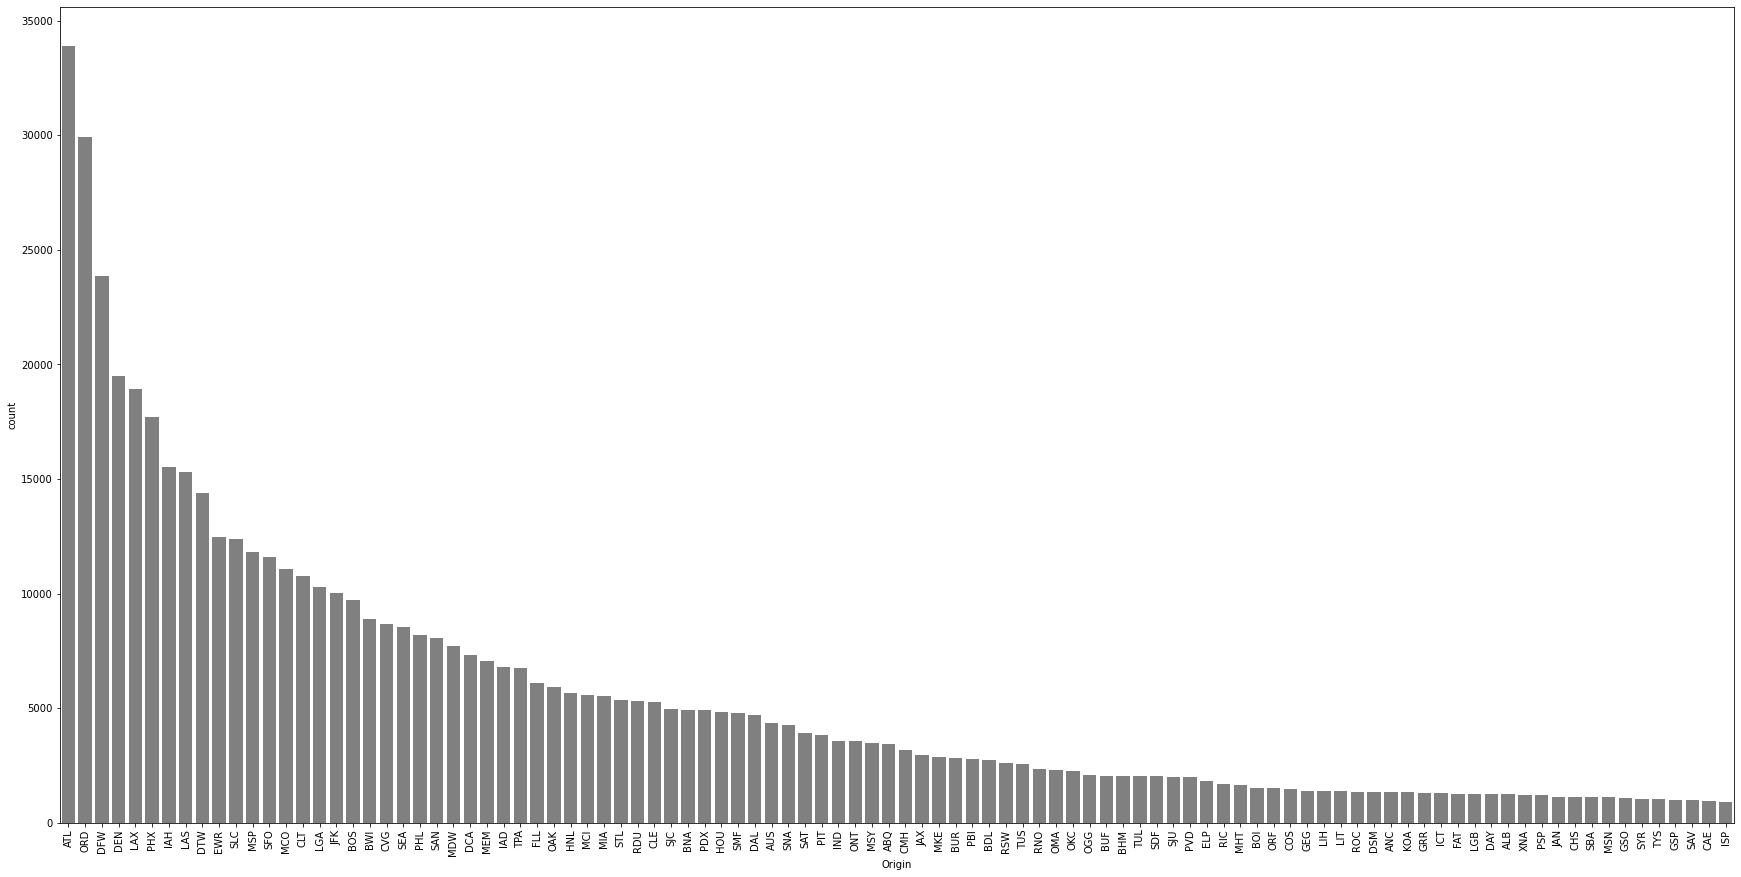

In [14]:
#Flight origin count (all flights) - Only shown Top 100 destinations shown.

plt.figure(figsize=(30,15))
order4=df.Origin.value_counts().nlargest(100).index
sb.countplot(data=df, x='Origin', color='grey', order=order4);
plt.xticks(rotation=90);

**Comments:** Similar to destinations, count tapers down from international airports to more local airports in an expected manner.

#### Univariate Exploration #6: Flights per Plane

We are looking at the number of flights per plane noted by the plane tail number.

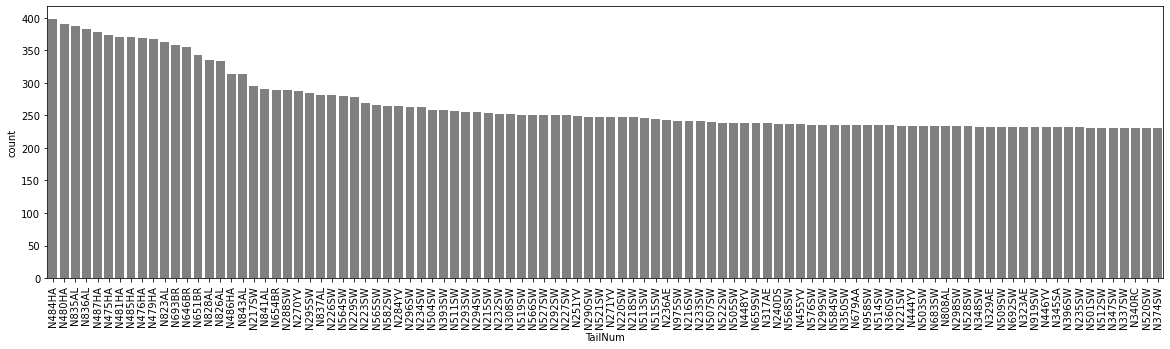

In [15]:
#Planes with highest flight counts - Only showing Top 100

plt.figure(figsize=(20,5))
order5=df.TailNum.value_counts().nlargest(100).index
sb.countplot(data=df, x='TailNum', color='grey', order=order5);
plt.xticks(rotation=90);

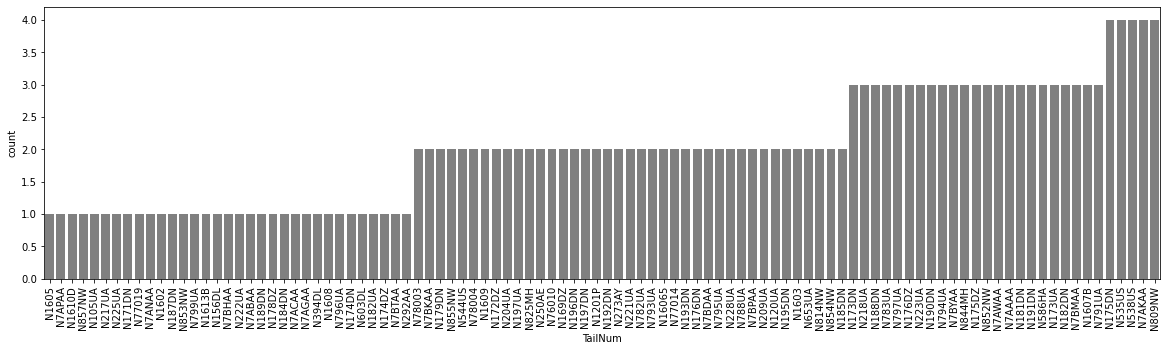

In [16]:
#Planes with lowest flight counts - Only showing Bottom 100

plt.figure(figsize=(20,5))
order5=df.TailNum.value_counts().nsmallest(100).index
sb.countplot(data=df, x='TailNum', color='grey', order=order5);
plt.xticks(rotation=90);

**Comments:** Planes appear to have 1 to approximately 400 flights each with a very gradual taper of flights per plane. This does not seem unexpected.

#### Univariate Exploration #7: Flights per Distance

We are looking at the number of flights per distance in miles.

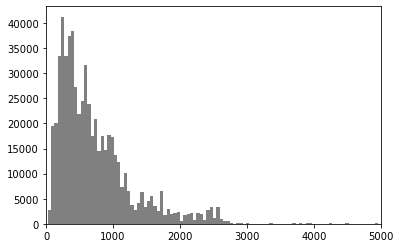

In [17]:
#Flight distance count by bins (all flights)

plt.hist(data=df,x='Distance',bins=100, color='grey');
plt.xlim(0,5000);

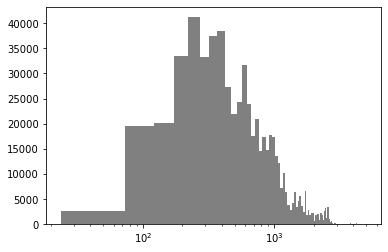

In [18]:
#Transformed to logscale

plt.hist(data=df,x='Distance',bins=100, color='grey');
plt.xscale('log');

**Comments:** Flights appear concentrate around 300mi. The graph is right skewed with bigger distance flights being less common. From the log scale graph, no additional input appears to be gain except to confirm that there are a few spikes.

#### Univariate Exploration #7: Flights by Day of the Week

We are looking at the number of flights by day of the week.

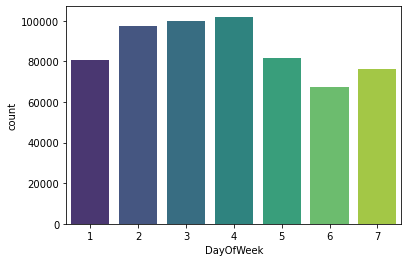

In [19]:
#Flight day of the week count. (all flights)

sb.countplot(data = df, x = 'DayOfWeek', palette='viridis');

**Comments:** Flights generally appear to be well distributed by day of the week. 

#### Univariate Exploration #8: Flights per Scheduled Departure Time

We are looking at the number of flights by Scheduled Departure Time.

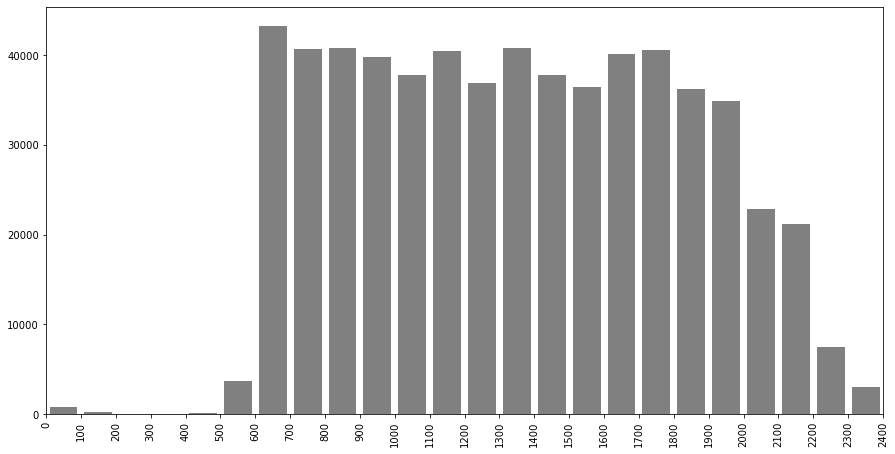

In [51]:
#Flight schedule departure time count by the hour. (all flights)

ticks1=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
bins1=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
plt.figure(figsize=(15,7.5))
plt.hist(data=df,x='CRSDepTime',bins=bins1, rwidth=8/10, color='grey');
plt.xlim(0,2400);
plt.xticks(ticks1,ticks1);
plt.xticks(rotation=90);

**Comments:** It appears that most flights occur between 6 and 22 hours. Then it either drops to a few or almost no flights. This is expected due to human behavior.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

My value of interest is cancellations, which is marked either 0 or 1 to determine how many flights are cancelled. This data appears to be clean as only 0 and 1 have been inputted. It is clear that cancellations make up a small percent of all flights. No transformations were performed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distribution for the departure times were unusual, but this was due to human scheduling of flights leading to less overnight flights. The flight distance distribution was a bit unusual due to it spiking, but not unexpected as it might reflect popular origin-destination combos with a specific distance. For the distance feature, I also set the distance count to log scale to see if any other insights were visible, but nothing new was noted.


## Bivariate Exploration

For bi-variate explorations, I have made a DataFrame with just the cancelled flights into df2 below.

In [21]:
# Query cancelled flights only as df2

df2=df[df.Cancelled==1]

#### Bivariate Exploration #1: Cancelled vs Non-Cancelled Flights by Carrier

We are looking at the cancelled flight proportion per carrier.

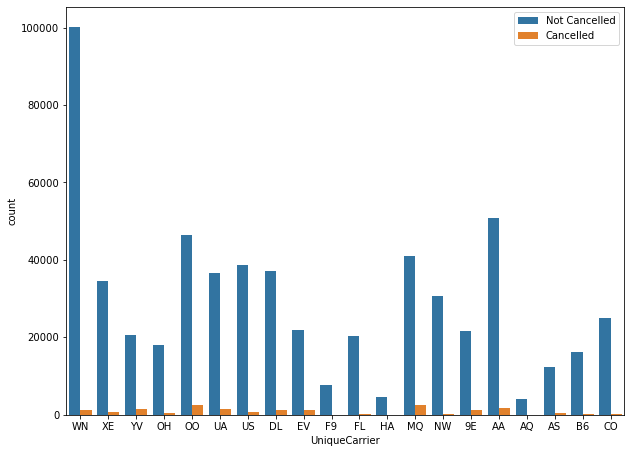

In [22]:
#Clustered bar chart for cancelled and non-cancelled flights per carrier
plt.figure(figsize=(10,7.5))
sb.countplot(data = df, x = 'UniqueCarrier', hue = 'Cancelled');
plt.legend(labels=['Not Cancelled','Cancelled']);

In [23]:
#Feature engineering new cancellation proportion table for Carrier.

df3=pd.DataFrame(df2.groupby('UniqueCarrier').Cancelled.count())
df3['all_flights']=pd.DataFrame(df.groupby('UniqueCarrier').Cancelled.count())
df3['cancelled_prop']=df3['Cancelled']*100/df3['all_flights']
df3=df3.sort_values('cancelled_prop', ascending=False)
df3=df3.reset_index()

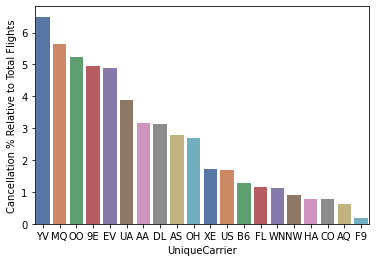

In [24]:
#Barplot cancellation %s per Unique Carrier.

sb.barplot(data=df3, x='UniqueCarrier', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');

**Comments:** Based on the graph above, some carriers have a higher percentage of cancelled flights. WN, for example, has a low percentage of cancelled flights considering it has so many total flights. This was clarified by feature engineering a column of cancelled flights per carrier. In this graph, it is clear that airlines such as YV, MQ, OO, 93, and EV have much higher cancellation rates relative to WN and AA.

#### Bivariate Exploration #2: Cancelled vs Non-Cancelled Flights by Destination

We are looking at the cancelled flight proportion by destination.

In [25]:
#Feature engineering new cancellation proportion table for Destination.

df4=pd.DataFrame(df2.groupby('Dest').Cancelled.count())
df4['all_flights']=pd.DataFrame(df.groupby('Dest').Cancelled.count())
df4['cancelled_prop']=df4['Cancelled']*100/df4['all_flights']
df4=df4.sort_values('cancelled_prop', ascending=False)
df4=df4.reset_index()
df4=df4[df4.all_flights>30]

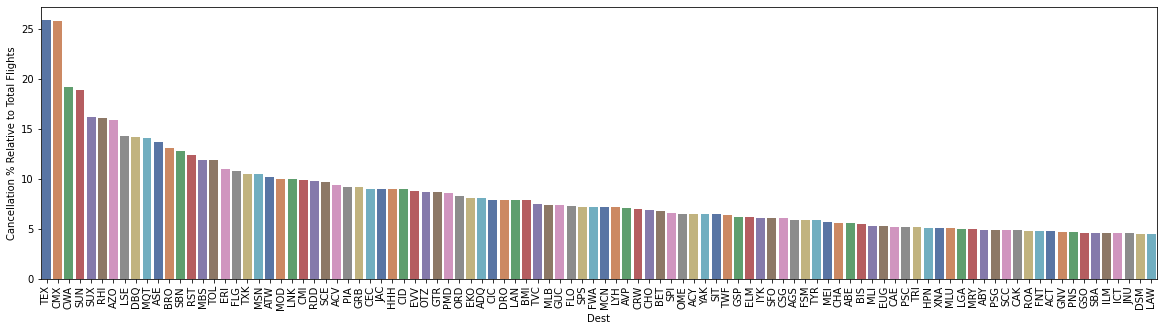

In [26]:
#Barplot cancellation %s per Destination.- Only the 100 most cancelled (by %) destinations shown. Only locations with atleast 30 flights are listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df4.head(100), x='Dest', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);

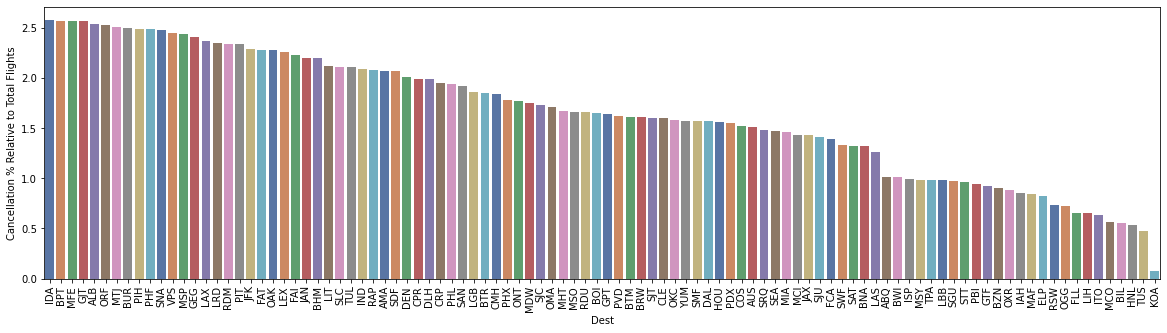

In [27]:
#Barplot cancellation %s per Destination.- Only the 100 least cancelled (by %) destinations shown. Only locations with atleast 30 flights are listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df4.tail(100), x='Dest', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);

**Comments:** From the cancellation % barplots, it is clear that smaller airports (e.g. county and regional) have the highest cancellation percentages. On the other hand, it appears that international airports have less cancellations.

#### Bivariate Exploration #3: Cancelled vs Non-Cancelled Flights by Origin

We are looking at the cancelled flight proportion by origin.

In [28]:
#Feature engineering new cancellation proportion table for Origin.

df5=pd.DataFrame(df2.groupby('Origin').Cancelled.count())
df5['all_flights']=pd.DataFrame(df.groupby('Origin').Cancelled.count())
df5['cancelled_prop']=df5['Cancelled']*100/df5['all_flights']
df6=df5.sort_values('cancelled_prop', ascending=False)
df6=df6.reset_index()
df6=df6[df6.all_flights>30]

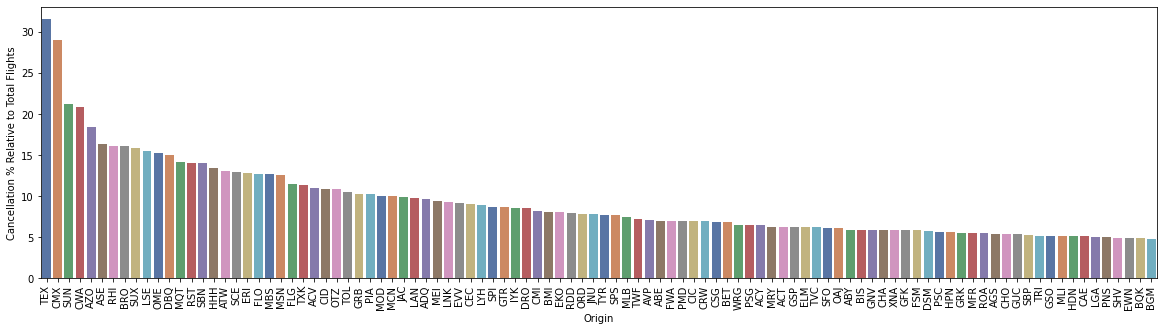

In [29]:
#Barplot cancellation %s per Origin - Only the 100 most cancelled (by %) origins shown. Only locations with atleast 30 flights are listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df6.head(100), x='Origin', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);

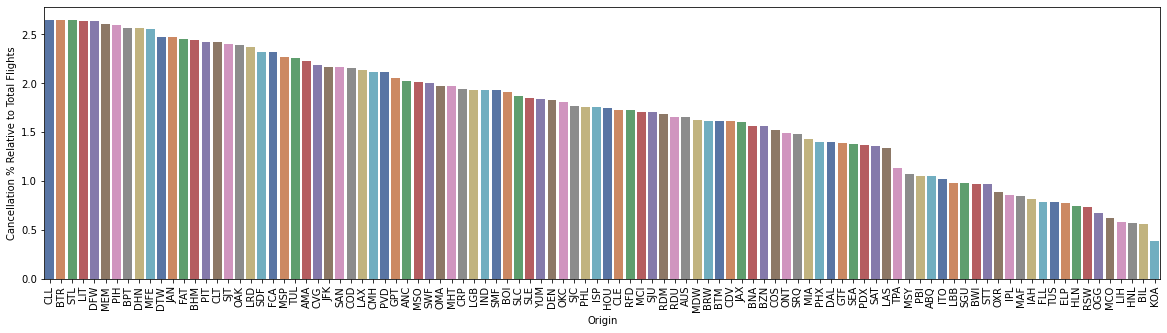

In [30]:
#Barplot cancellation %s per Origin - Only the 100 most cancelled (by %) origins shown. Only locations with atleast 30 flights are listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df6.tail(100), x='Origin', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);

**Comments:** Similar to destinations, international airports appear to have less cancellations than more local airports.

#### Bivariate Exploration #4: Cancelled vs Non-Cancelled Flights by Plane

We are looking at the cancelled flight proportion by plane tail number.

In [31]:
#Feature engineering new cancellation proportion table for planes according to tail numbers.

df7=pd.DataFrame(df2.groupby('TailNum').Cancelled.count())
df7['all_flights']=pd.DataFrame(df.groupby('TailNum').Cancelled.count())
df7['cancelled_prop']=df7['Cancelled']*100/df7['all_flights']
df7=df7.sort_values('cancelled_prop', ascending=False)
df7=df7.reset_index()
df7=df7[df7.all_flights>30]

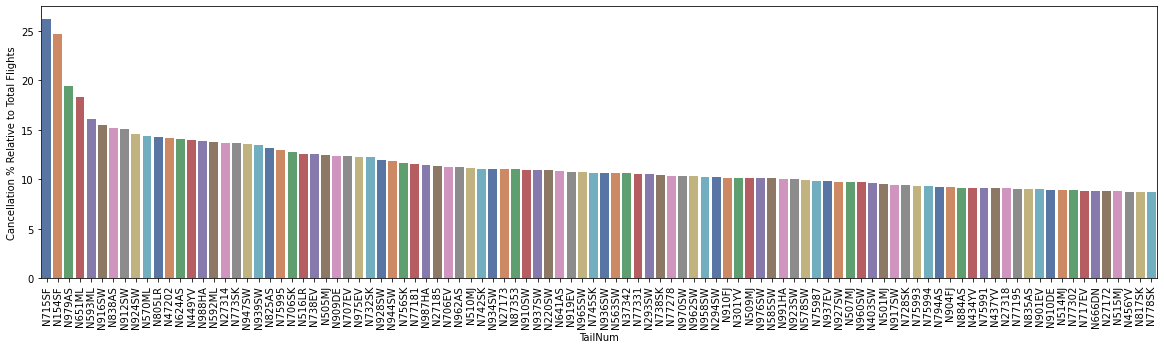

In [32]:
#Barplot for cancellation proportions by plane tail number. Only planes with atleast 30 flights were listed and 
#only planes with the top 100 cancellation proportions were listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df7.head(100), x='TailNum', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);

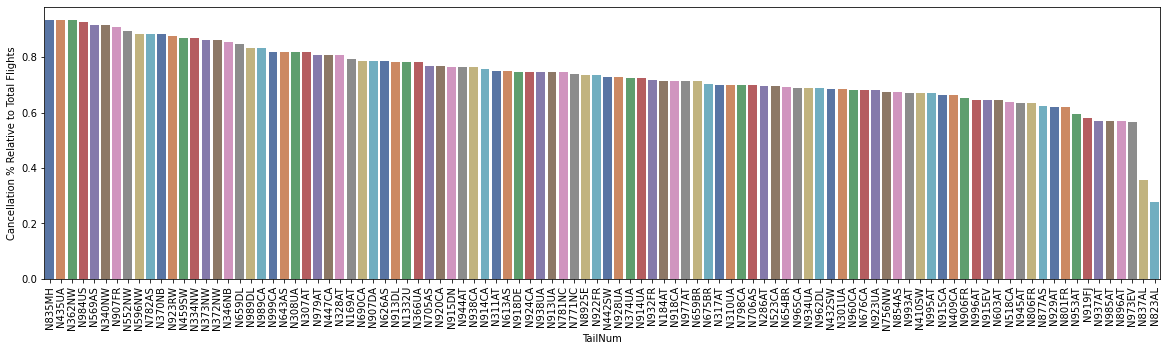

In [33]:
#Barplot for cancellation proportions by plane tail number. Only planes with atleast 30 flights were listed and 
#only planes with the bottom 100 cancellation proportions were listed.

plt.figure(figsize=(20,5))
sb.barplot(data=df7.tail(100), x='TailNum', y='cancelled_prop', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);

**Comments:** It appears some planes have lower cancellation rates than others. However, this might not be a very useful information as you would have to track which flight has a specific plane to try to predict cancellation. It might be more insightful to notice whether an airline has let's say older planes that lead to more cancellations as part of their fleet.

#### Bivariate Exploration #5: Cancelled vs Non-Cancelled Flights by Distance

We are looking at the cancelled flight proportion by origin.

Text(0.5, 0, 'Distance (mi)')

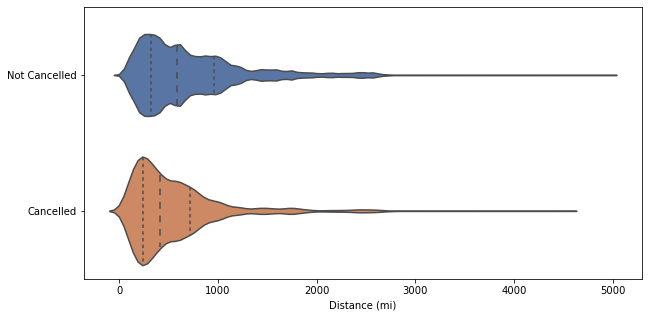

In [34]:
plt.figure(figsize=(10,5))
sb.violinplot(data=df, x='Distance', y='Cancelled', orient='h', inner='quartile', palette='deep');
plt.yticks([0,1],['Not Cancelled','Cancelled']);
plt.ylabel(None)
plt.xlabel('Distance (mi)')

**Comments:** Flights that get cancelled tend to have less than 1000mi in miles. However, this is also due to the fact that most flights are less than 1000mi. This needs to be further explored in the multi-variate section by 

#### Bivariate Exploration #6: Cancelled vs Non-Cancelled Flights Day of the Week

We are looking at the cancelled flight proportion by Day of the Week

In [35]:
#Feature engineering new cancellation proportion table by Day of the Week.

df9=df.groupby(['DayOfWeek','Cancelled']).size().unstack()
df9.rename(columns={0:'Not_Cancelled',1:'Cancelled'}, inplace=True)
df9['total_flights']=df9['Not_Cancelled']+df9['Cancelled']
df9['cancelled_proportion']=df9.Cancelled*100/df9.total_flights
df9=df9.reset_index()

<AxesSubplot:xlabel='DayOfWeek', ylabel='cancelled_proportion'>

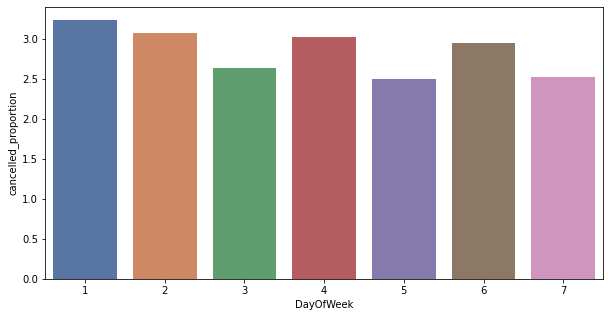

In [36]:
plt.figure(figsize=(10,5))
sb.barplot(data=df9,x='DayOfWeek',y='cancelled_proportion',palette='deep')

**Comments:** It does not appear that day of the week has a big impact on cancellations as cancellations range from 2.5-3.3%, which is not too significant.

#### Bivariate Exploration #7: Cancelled vs Non-Cancelled Flights by Departure Time

We are looking at the cancelled flight proportion by Departure Time

In [37]:
#Feature engineering new cancellation proportion table by hourly departure times through hourly bins.

newbin=[0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400]
df10=df.copy()
df10.CRSDepTime=pd.cut(x=df10.CRSDepTime, bins=newbin)
df10=df10.groupby(['CRSDepTime','Cancelled']).size().unstack()
df10=df10.reset_index()
df10.rename(columns={0:'Not_Cancelled',1:'Cancelled'}, inplace=True)
df10['total_flights']=df10['Not_Cancelled']+df10['Cancelled']
df10['cancelled_proportion']=df10.Cancelled*100/df10.total_flights

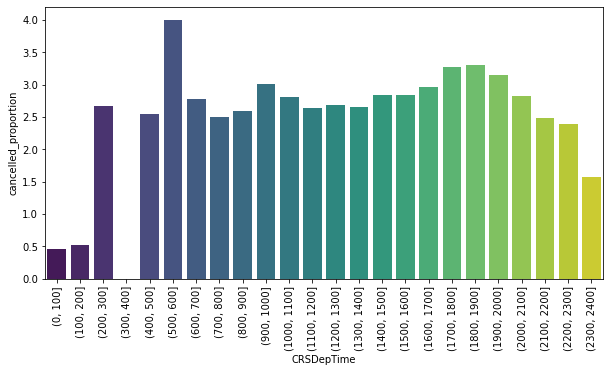

In [38]:
plt.figure(figsize=(10,5))
sb.barplot(data=df10,x='CRSDepTime',y='cancelled_proportion',palette='viridis');
plt.xticks(rotation=90);

**Comments:** It appears that the worst departure times for cancellation is 5-6am. Throughout the day, cancellations rates are steady betweeen 2.5 and 3%. The time slots between 23:00 to 2:00 and 3:00 and 4:00 appear to have the lowest cancellation rates ranging from 0 to ~1.6%.

#### Bivariate Exploration #8: Correlation between Distance, Day of Week, CRS Departure Time

We are looking to see how these three variables relate.

In [58]:
numeric_vars = ['Distance','DayOfWeek','CRSDepTime']

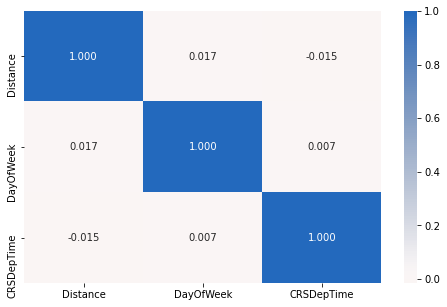

In [56]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

**Comments:** It appears there isn't much of a correlation between the three variables as their correlation is near 0 when compared between each other.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Multivariate Exploration #1: Route Cancellation Rates

We will be exploring route combinations (merging Dest and Origin) to determine if certain routes are worse than others by calculating a cancellation % for routes with more than 50 total flights.

In [187]:
df11=df.copy()
df11['route']= df11.Origin +'-'+ df11.Dest
df11=df11.groupby(['route','Origin','Dest','Cancelled']).size().unstack()
df11=df11.reset_index()
df11.rename(columns={0:'Not_Cancelled',1:'Cancelled'}, inplace=True)
df11.Cancelled.replace(np.nan,0, inplace=True)
df11['total_flights']=df11['Not_Cancelled']+df11['Cancelled']
df11['cancelled_proportion']=df11.Cancelled*100/df11.total_flights
df11.drop(columns=['Cancelled','Not_Cancelled'], inplace=True)
df11=df11[df11.total_flights>50]
df11=df11.sort_values('cancelled_proportion', ascending=False)

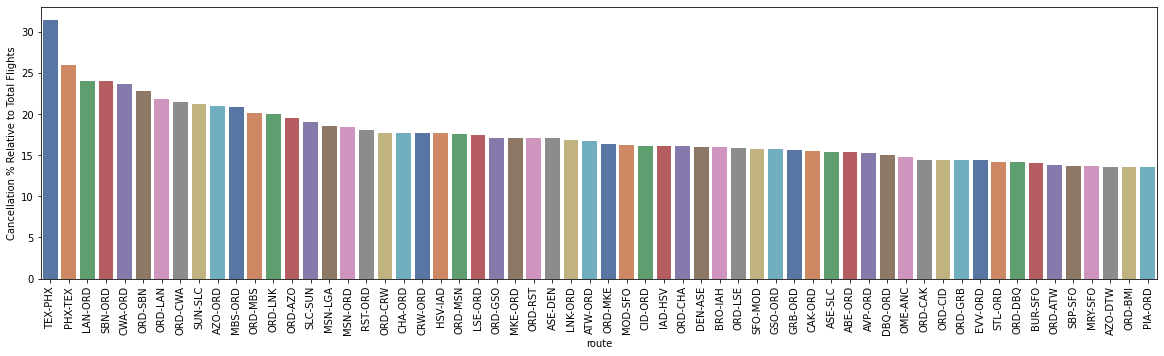

In [194]:
plt.figure(figsize=(20,5))
sb.barplot(data=df11.head(60), x='route', y='cancelled_proportion', palette='deep');
plt.ylabel('Cancellation % Relative to Total Flights');
plt.xticks(rotation=90);

**Comments:** It appears that some routes are definitely much worse than others. Some of the airports listed there were not noted in the destination and origin airport bivariate exploration. It appears that route might be a better indicator for cancellation rates instead of individual airports.

#### Multivariate Exploration #2: Planes with Highest Cancellations & Carrier Ownership

Previously, we determined that some planes have very high cancellation rates. This might be an indication that some planes are more faulty than others leading to cancellations. 

In [256]:
#List of Top 100 Planes with Highest Cancellation Rates from Bivariate Exploration #4
list1=list(df7.iloc[0:100].TailNum.values)

#Creating DF for plotting.
df12=df.copy()
df12=df12[df12.TailNum.isin(list1)]
df12=pd.DataFrame(df12.groupby('UniqueCarrier').TailNum.size())
df12=df12.reset_index()

Text(0, 0.5, 'Plane Count')

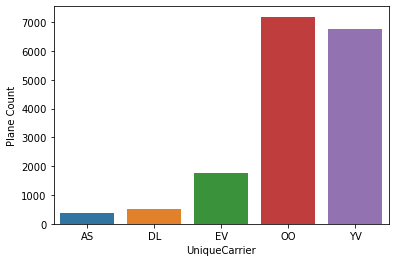

In [251]:
sb.barplot(data=df12, x='UniqueCarrier', y='TailNum');
plt.ylabel('Plane Count')

**Comments:** It appears that some of the carriers with the highest cancellation rates also have the most planes with the highest cancellation rates. It is unclear on weather this is due to faulty or old planes as plane ages or plane issues aren't included in this data.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!